# Scores

### Introduction:

This time you will create the data.

***Exercise based on [Chris Albon](http://chrisalbon.com/) work, the credits belong to him.***

### Step 1. Import the necessary libraries

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

### Step 2. Create the DataFrame that should look like the one below.

In [106]:
first_name = pd.Series(['Jason', 'Molly', 'Tina', 'Jake', 'Amy']) 
last_name = pd.Series(['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze'])
age = pd.Series([42, 52, 36, 24, 73])
female = pd.Series([0, 1, 1, 0, 1])
preTestScore = pd.Series([4, 24, 31, 2, 3])
posTestScore  = pd.Series([25, 94, 57, 62, 70])

df = pd.DataFrame({'first_name':first_name, 'last_name':last_name, 
                   'age':age, 'female':female, 'preTestScore':preTestScore, 
                   'posTestScore':posTestScore})
df

,first_name,last_name,age,female,preTestScore,posTestScore
0,Jason,Miller,42,0,4,25
1,Molly,Jacobson,52,1,24,94
2,Tina,Ali,36,1,31,57
3,Jake,Milner,24,0,2,62
4,Amy,Cooze,73,1,3,70


### Step 3. Create a Scatterplot of preTestScore and postTestScore, with the size of each point determined by age
#### Hint: Don't forget to place the labels

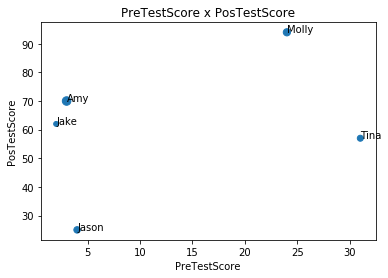

In [107]:
preTestScore = plt.scatter(df.preTestScore.values, df.posTestScore.values, s=df.age.values)

plt.title('PreTestScore x PosTestScore')
plt.xlabel('PreTestScore')
plt.ylabel('PosTestScore')

#Cria dicionario com primeiro nome e coordenadas do ponto
dicionario = {df.first_name[i]: tuple([df.preTestScore[i], df.posTestScore[i]])
             for i in range(len(df))}

#output: dicionario = {'Jason': (4, 25),'Molly': (24, 94),'Tina': (31, 57),'Jake': (2, 62),'Amy': (3, 70)}

#Anota em cada ponto o primeiro nome
for j in dicionario:
    
    #plt.annotate pede label e as coordenadas do ponto
    plt.annotate(str(j), dicionario[str(j)])

### Step 4. Create a Scatterplot of preTestScore and postTestScore.
### This time the size should be 4.5 times the postTestScore and the color determined by sex

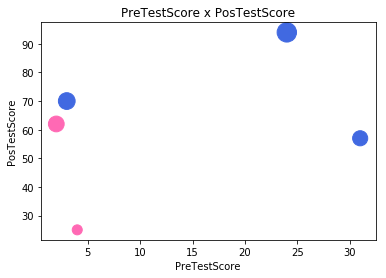

In [108]:
rosa = '#FF69B4'
azul = '#4169E1'

'''
Tentei usar, mas não deu certo, pois em vez de lista o output foi um 'generator'(?)

color=[]
color.append(rosa if i==1 else azul 
            for i in df.female.values)
'''

color = []
for i in df.female.values:
    
    #azul se for mulher, rosa se for homem
    if i == 1:
        color.append(azul)
    else:
        color.append(rosa)

preTestScore2 = plt.scatter(df.preTestScore.values, df.posTestScore.values, 
                            s=4*df.posTestScore.values, c=color)

plt.title('PreTestScore x PosTestScore')
plt.xlabel('PreTestScore')
plt.ylabel('PosTestScore')

### BONUS: Create your own question and answer it.

#### Criar gráfico de barras agrupadas com os resultados

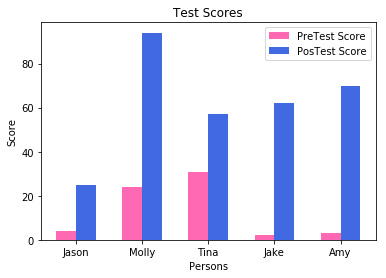

In [113]:
#Largura das barras
#não pode ser muito maior por causa da escala do gráfico
barWidth = 0.3 

#Definindo posição de cada coluna
#[0,1,2,3, 4] é a posição X no gráfico de cada elemento
#essa segunda coluna estará logo após terminar a largura da primeira
posicao_preTest = np.arange(len(df))
posicao_posTest = [i + barWidth for i in posicao_preTest]

#Criar as barras
plt.bar(posicao_preTest, df.preTestScore, width=barWidth, color=rosa, label='PreTest Score')
plt.bar(posicao_posTest, df.posTestScore, width=barWidth, color=azul, label='PosTest Score')

#Configurar os labels
plt.xlabel('Persons')
plt.ylabel('Score')
plt.title('Test Scores')

#Posicionar os labels adequadamente, no meio entre as barras
plt.xticks([x + barWidth/2 for x in posicao_preTest], df.first_name.values)

#Apresentar legenda
plt.legend()